# 老師的網站敘述(之後砍)

> https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/

1. 觀察資料。譬如利用 pandas 的 head() 指令呈現前面幾筆資料。

2. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性，參考如圖一（或其他類似的圖）。

3. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考，參考如圖二。

4. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。參考如圖三。

5. 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖四（左）。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

5. 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色，如圖四（右）。

6. 如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

7. Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。（譬如可以畫 eigenvectors 與變數對應的 heatmap）。

# 作品目標

1. 觀察wine資料集，觀察變數間的相關度
2. 進行主成分分析
3. 觀察標準化後的資料好不好分類

> 執行環境/套件版本紀錄
> - Kernel : data_env(virtual environment)
> - Python version : 3.12.5
> - IDE : Vscode, version 1.97.2
> - pandas version :                  2.2.3
> - scikit-learn  version :            1.5.2



# 資料簡介與觀察

資料集為對義大利同一地區種植但來自三個不同品種的葡萄酒進行化學分析的結果。分析確定了三種葡萄酒中各13種成分的含量。

In [29]:
# 下載wine資料
from sklearn.datasets import load_wine
# 載入資料
wine = load_wine()
# 載入資料
X = wine.data
# 載入標籤
y = wine.target

# 另一種
# x,y = load_wine(return_X_y=True, as_frame=True)
# label = x.columns


# 變成DataFrame
import pandas as pd
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.DataFrame(y) #, columns=['target']
df = pd.concat([X, y], axis=1)

# 顯示資料筆數
print("資料筆數:",df.shape[0])
print("資料columns數: ",df.shape[1])


資料筆數: 178
資料columns數:  14


In [28]:
df.head() # 顯示前五筆資料


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## PCA

執行主成分分析(PCA)需要經過以下步驟:
1. 標準化資料
2. 建立共變異矩陣
3. 從共變異矩陣分解出特徵值及特徵向量
4. 以遞減方式對特徵值排序，以便對特徵向量排名

### 資料處理與視覺化

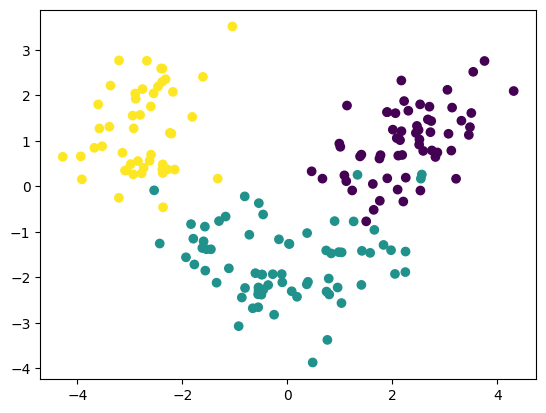

In [36]:
# 資料標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) # 進行標準化

# 繪圖
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()


